In [105]:
'''
PS4 Q1
@author: Patrick Horlaville
March 24th, 2022
'''

'\nPS4 Q1\n@author: Patrick Horlaville\nMarch 24th, 2022\n'

In [79]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.optimize import curve_fit

from matplotlib.ticker import FormatStrFormatter

In [38]:
U_space = np.linspace(0.1, 1000, 1000)
M_arr = np.array([0.01*(10**i) for i in range(5)])

In [39]:
def cost(mass, vel):
    
    fac = mass/0.035
    
    para = (1.88*(10**(-4)))*(vel**2)*(fac**(-1/3))
    meta = (10.79)*(vel**(-1))*(fac**(-1/4))
    ind = (3.11)*(vel**(-2))*(fac**(1/3))
    
    tot_cost = para + meta + ind
    
    return tot_cost

In [40]:
comps = [0 for i in range(5)]
for i in range(5):
    comps[i] = cost(M_arr[i], U_space)

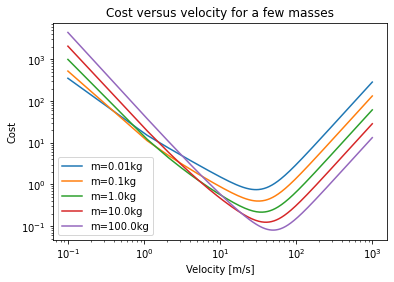

In [41]:
for i in range(5):
    mpl.plot(U_space, comps[i], label = 'm='+str(M_arr[i])+'kg' )
    mpl.xlabel('Velocity [m/s]')
    mpl.ylabel('Cost')
    mpl.title('Cost versus velocity for a few masses')
    mpl.xscale('log')
    mpl.yscale('log')
    mpl.legend()

In [42]:
trough_vel = [0 for i in range(5)]
min_cost = [0 for i in range(5)] 
for i in range(5):
    trough_vel[i], min_cost[i] = U_space[np.argmin(comps[i])], comps[i][np.argmin(comps[i])]

In [46]:
min_cost = np.array(min_cost)
trough_vel = np.array(trough_vel)

In [64]:
def power_law(mass, exponent, const):
    return const*(mass)**exponent

In [65]:
popt, pcov = curve_fit(power_law, M_arr, min_cost)

In [71]:
best_exp = popt[0]
best_coef = popt[1]

In [90]:
exp_err = np.sqrt(np.diag(pcov))[0]
coef_err = np.sqrt(np.diag(pcov))[1]

In [82]:
M_space = np.linspace(0.01, 100, 1000)

Text(0.5, 0.5, '$\\gamma = -0.264(7)$')

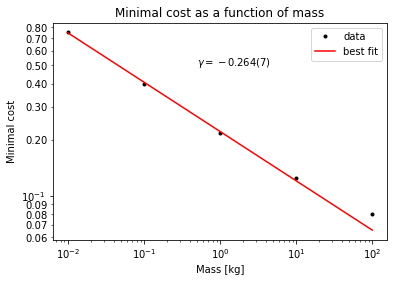

In [104]:
mpl.plot(M_arr, min_cost, '.k', label = 'data')
mpl.plot(M_space, power_law(M_space, best_exp, best_coef), 'r', label = 'best fit')

mpl.xscale('log')
mpl.yscale('log')
mpl.tick_params(axis = 'y', which = 'minor')
ax = mpl.gca()
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))

mpl.title('Minimal cost as a function of mass')
mpl.ylabel('Minimal cost')
mpl.xlabel('Mass [kg]')
mpl.legend()

mpl.text(0.5, 0.5, r'$\gamma = -0.264(7)$')

In [98]:
print('exponent parameter =', best_exp, '(+/-)', exp_err)
print('coefficient parameter =', best_coef, '(+/-)', coef_err)

exponent parameter = -0.26430345695774876 (+/-) 0.006893330014624235
coefficient parameter = 0.22133935469646776 (+/-) 0.006156661266052276


Given a best fit exponent parameter of our power law -0.264 (+/-) 0.007, we have a proportionality relationship that goes like

$$
\epsilon_{min} \propto m^{-0.264(7)}
$$

which is of the same order of the coefficient found in question 1.1 (which was -0.2778) and the one from Tucker (-0.2)

Notice, at high mass, the data is getting away from the fit. This makes sense given that 1) this fit was built on ignoring the contribution of the induced drag and 2) as the mass increases, the importance of the contribution of the metabolic power and parasitic drag decreases and the contribution of the induced drag increases. Therefore, our model gets less and less accurate as the mass increases given the assumption that we made by ignoring the contribution of the induced drag becomes less and less accurate (in e_cost, the only term whose m variable has a positive exponent is the induced drag contribution, that's why the induced drag gets more contribution as the mass increases).